# In the notebook we illustrate the measurement of $g$ 

First, we start by generating a pseudo dataset

t,x
0.000000,55.97295
1.052632,60.24481
2.105263,76.80447
3.157895,88.16154
4.210526,121.13417
5.263158,195.92788
6.315789,249.58183
7.368421,318.65717
8.421053,399.96236
9.473684,479.96346


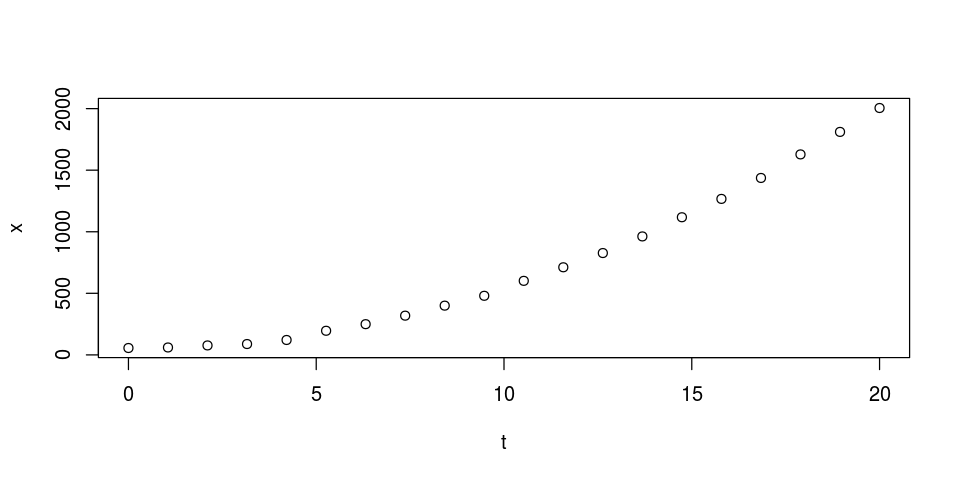

In [10]:
Npoints = 20
x0 = 50

g = 9.81
t = seq(0, 20, length=Npoints)
x = 0.5*g*t^2 + x0 + rnorm(Npoints, mean=0, sd=8)
plot(t, x)
ds = data.frame(t, x)
ds
write.csv(ds, "PositionVsTime.csv")

mytSq 
9.794721

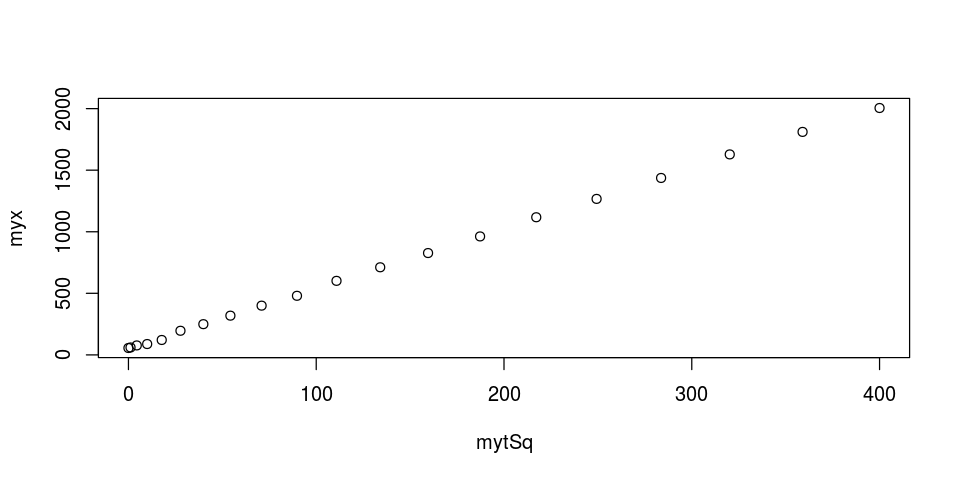

In [11]:
myds = read.csv("PositionVsTime.csv")
#myds

myx = myds$x
mytSq = myds$t^2

options(repr.plot.width=8, repr.plot.height=4)

plot(myx ~ mytSq)
model <- lm(myx~mytSq, data=myds)
coefs = coefficients(model)
coefs[2]*2